# Task 3 — Forecast Future Market Trends (TSLA)

This notebook demonstrates **Task 3** end-to-end and produces the required deliverables:

- **6–12 month forecasts** using the **best-performing model from Task 2** (ARIMA-like model on log returns)
- **Forecast visualizations with uncertainty bounds** (95% prediction band / fan chart)
- **Trend analysis summary** (1–2 paragraphs)
- **Opportunities and risks** list
- **Critical reliability assessment** across horizons

## Rubric mapping
- **(a) Future Forecasts**: 6m (126 business days) and 12m (252 business days)
- **(b) Confidence Intervals**: plots show 95% prediction band
- **(c) Trend Analysis**: trend direction + CI width change over horizon
- **(d) Opportunities & Risks**: documented bullets grounded in forecast + uncertainty


In [1]:
# 0) Setup: imports + repo-root detection
import os
import sys
import subprocess
from pathlib import Path

import pandas as pd


def find_repo_root(start: Path | None = None) -> Path:
    """Walk upward until we find a folder containing both 'src' and 'data'."""
    cur = (start or Path.cwd()).resolve()
    for _ in range(10):
        if (cur / "src").exists() and (cur / "data").exists():
            return cur
        cur = cur.parent
    raise RuntimeError("Could not auto-detect repo root. Run from inside the repo.")


REPO_ROOT = find_repo_root(Path.cwd())
print("Notebook working directory:", os.getcwd())
print("Repo root:", REPO_ROOT)

# Make repo importable so `from src import ...` works
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))


Notebook working directory: d:\Python\Week 9\portfolio-optimization\notebooks
Repo root: D:\Python\Week 9\portfolio-optimization


## 1) Verify required artifacts exist (evidence)

Task 3 relies on:
- Task 1 processed data: `prices.parquet`, `returns.parquet`
- Task 2 best-model spec: `arima_params_val.json` (fallback: `arima_params.json`)
- Optional: `split_info.json` and Task 2 forecast CSVs for test overlay in plots


In [2]:
from src import task3_config as config

required = [
    REPO_ROOT / config.PRICES_PATH,
    REPO_ROOT / config.RETURNS_PATH,
]

spec_val = REPO_ROOT / config.ARIMA_SPEC_VAL_PATH
spec_base = REPO_ROOT / config.ARIMA_SPEC_PATH
spec_used = spec_val if spec_val.exists() else spec_base
required.append(spec_used)

optional = [
    REPO_ROOT / config.SPLIT_INFO_PATH,
    REPO_ROOT / config.TASK2_MERGED_FORECASTS_PATH,
    REPO_ROOT / config.TASK2_ARIMA_TEST_FORECAST_PATH,
    REPO_ROOT / config.TASK2_ARIMA_VAL_FORECAST_PATH,
    REPO_ROOT / config.TASK2_LSTM_TEST_PRICE_FORECAST_PATH,
    REPO_ROOT / config.TASK2_LSTM_VAL_PRICE_FORECAST_PATH,
]

missing = [p for p in required if not p.exists()]

print("Required files:")
for p in required:
    print("  ", "OK " if p.exists() else "MISSING", p)

print("\nOptional files:")
for p in optional:
    print("  ", "OK " if p.exists() else "----", p)

if missing:
    raise FileNotFoundError("Missing required files:\n" + "\n".join(map(str, missing)))

print("\nAll required artifacts exist. Spec used:", spec_used)


Required files:
   OK  D:\Python\Week 9\portfolio-optimization\data\task1\processed\prices.parquet
   OK  D:\Python\Week 9\portfolio-optimization\data\task1\processed\returns.parquet
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\metrics\arima_params_val.json

Optional files:
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\metrics\split_info.json
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\forecasts\tsla_forecasts_merged.csv
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\forecasts\tsla_arima_forecast.csv
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\forecasts\tsla_arima_forecast_val.csv
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\forecasts\tsla_lstm_forecast_price.csv
   OK  D:\Python\Week 9\portfolio-optimization\outputs\task2\forecasts\tsla_lstm_forecast_val_price.csv

All required artifacts exist. Spec used: D:\Python\Week 9\portfolio-optimization\outputs\task2\metrics\arima_params_val.json


## 2) Run Task 3 pipeline (rubric a–d)

We run the scripts that generate forecasts, plots, and analysis summaries:

- **(a)** `scripts/task3_generate_forecast.py`
- **(b)** `scripts/task3_plot_forecast.py`
- **(c,d)** `scripts/task3_analyze_trends.py`


In [3]:
def run(cmd):
    print("Running:", " ".join(cmd))
    subprocess.check_call(cmd, cwd=str(REPO_ROOT))

runner = REPO_ROOT / "scripts" / "task3_run_all.py"
if runner.exists():
    run([sys.executable, "scripts/task3_run_all.py"])
else:
    run([sys.executable, "scripts/task3_generate_forecast.py"])
    run([sys.executable, "scripts/task3_plot_forecast.py"])
    run([sys.executable, "scripts/task3_analyze_trends.py"])

print("Task 3 pipeline complete.")


Running: d:\Python\Week 9\portfolio-optimization\Menv\Scripts\python.exe scripts/task3_run_all.py
Task 3 pipeline complete.


## 3) Deliverables: future forecasts (rubric a)

We load the generated forecast CSVs (6m and 12m) and preview them.


In [4]:
out_dir = REPO_ROOT / "outputs" / "task3"
fc_dir = out_dir / "forecasts"

price_6m = fc_dir / "tsla_prices_forecast_6m.csv"
price_12m = fc_dir / "tsla_prices_forecast_12m.csv"
logret_6m = fc_dir / "tsla_logret_forecast_6m.csv"
logret_12m = fc_dir / "tsla_logret_forecast_12m.csv"

for p in [price_6m, price_12m, logret_6m, logret_12m]:
    print("OK" if p.exists() else "MISSING", p)

if price_6m.exists():
    print("\nPrice forecast 6m head:")
    display(pd.read_csv(price_6m).head())

if price_12m.exists():
    print("\nPrice forecast 12m head:")
    display(pd.read_csv(price_12m).head())

if logret_6m.exists():
    print("\nLog-return forecast 6m head:")
    display(pd.read_csv(logret_6m).head())

if logret_12m.exists():
    print("\nLog-return forecast 12m head:")
    display(pd.read_csv(logret_12m).head())


OK D:\Python\Week 9\portfolio-optimization\outputs\task3\forecasts\tsla_prices_forecast_6m.csv
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\forecasts\tsla_prices_forecast_12m.csv
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\forecasts\tsla_logret_forecast_6m.csv
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\forecasts\tsla_logret_forecast_12m.csv

Price forecast 6m head:


,date,price_p05,price_p50,price_p95
0,2026-01-15,414.126018,439.659046,465.739166
1,2026-01-16,405.557291,439.990743,476.811511
2,2026-01-19,398.072337,439.889304,487.133875
3,2026-01-20,393.367528,440.990052,495.796977
4,2026-01-21,389.357373,442.375303,504.940169



Price forecast 12m head:


,date,price_p05,price_p50,price_p95
0,2026-01-15,414.126018,439.659046,465.739166
1,2026-01-16,405.557291,439.990743,476.811511
2,2026-01-19,398.072337,439.889304,487.133875
3,2026-01-20,393.367528,440.990052,495.796977
4,2026-01-21,389.357373,442.375303,504.940169



Log-return forecast 6m head:


,date,ret_mean,ret_lower,ret_upper
0,2026-01-15,0.001193,-0.068509,0.070895
1,2026-01-16,0.001193,-0.068509,0.070895
2,2026-01-19,0.001193,-0.068509,0.070895
3,2026-01-20,0.001193,-0.068509,0.070895
4,2026-01-21,0.001193,-0.068509,0.070895



Log-return forecast 12m head:


,date,ret_mean,ret_lower,ret_upper
0,2026-01-15,0.001193,-0.068509,0.070895
1,2026-01-16,0.001193,-0.068509,0.070895
2,2026-01-19,0.001193,-0.068509,0.070895
3,2026-01-20,0.001193,-0.068509,0.070895
4,2026-01-21,0.001193,-0.068509,0.070895


## 4) Deliverables: forecast plots with confidence intervals (rubric b)

We display the saved figures:
- Price forecast (6m, 12m) with **95% prediction band**
- CI width plots (p95 - p05)

These plots distinguish:
- historical prices
- Task 2 test predictions (if available)
- Task 3 future forecasts


OK D:\Python\Week 9\portfolio-optimization\outputs\task3\figures\fig_task3_price_forecast_6m.png
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\figures\fig_task3_price_forecast_12m.png
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\figures\fig_task3_ci_width_6m.png
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\figures\fig_task3_ci_width_12m.png


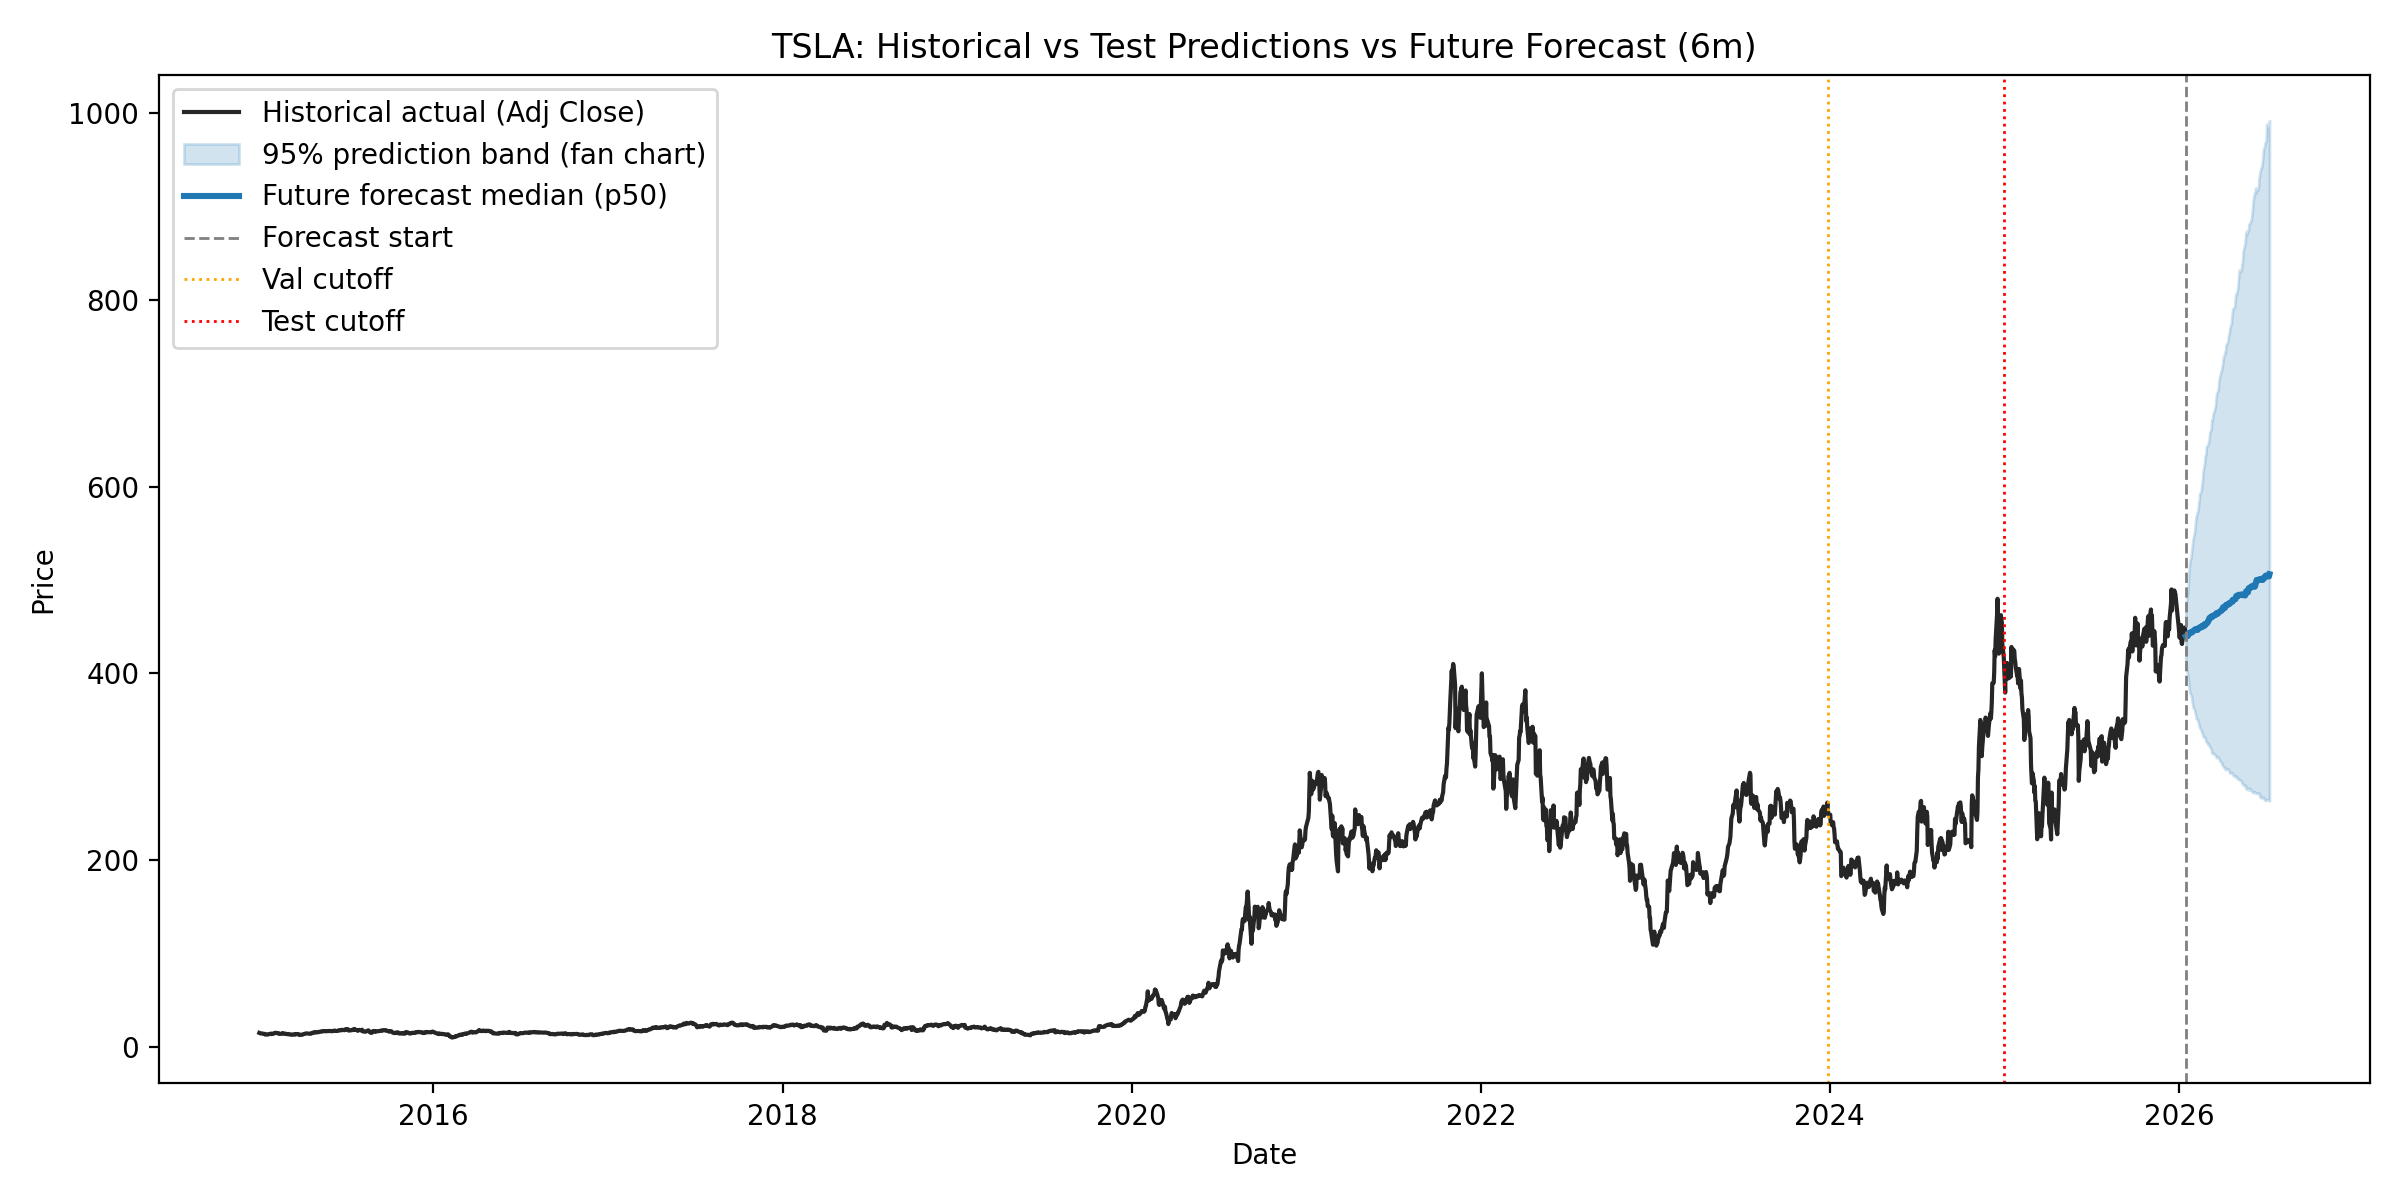

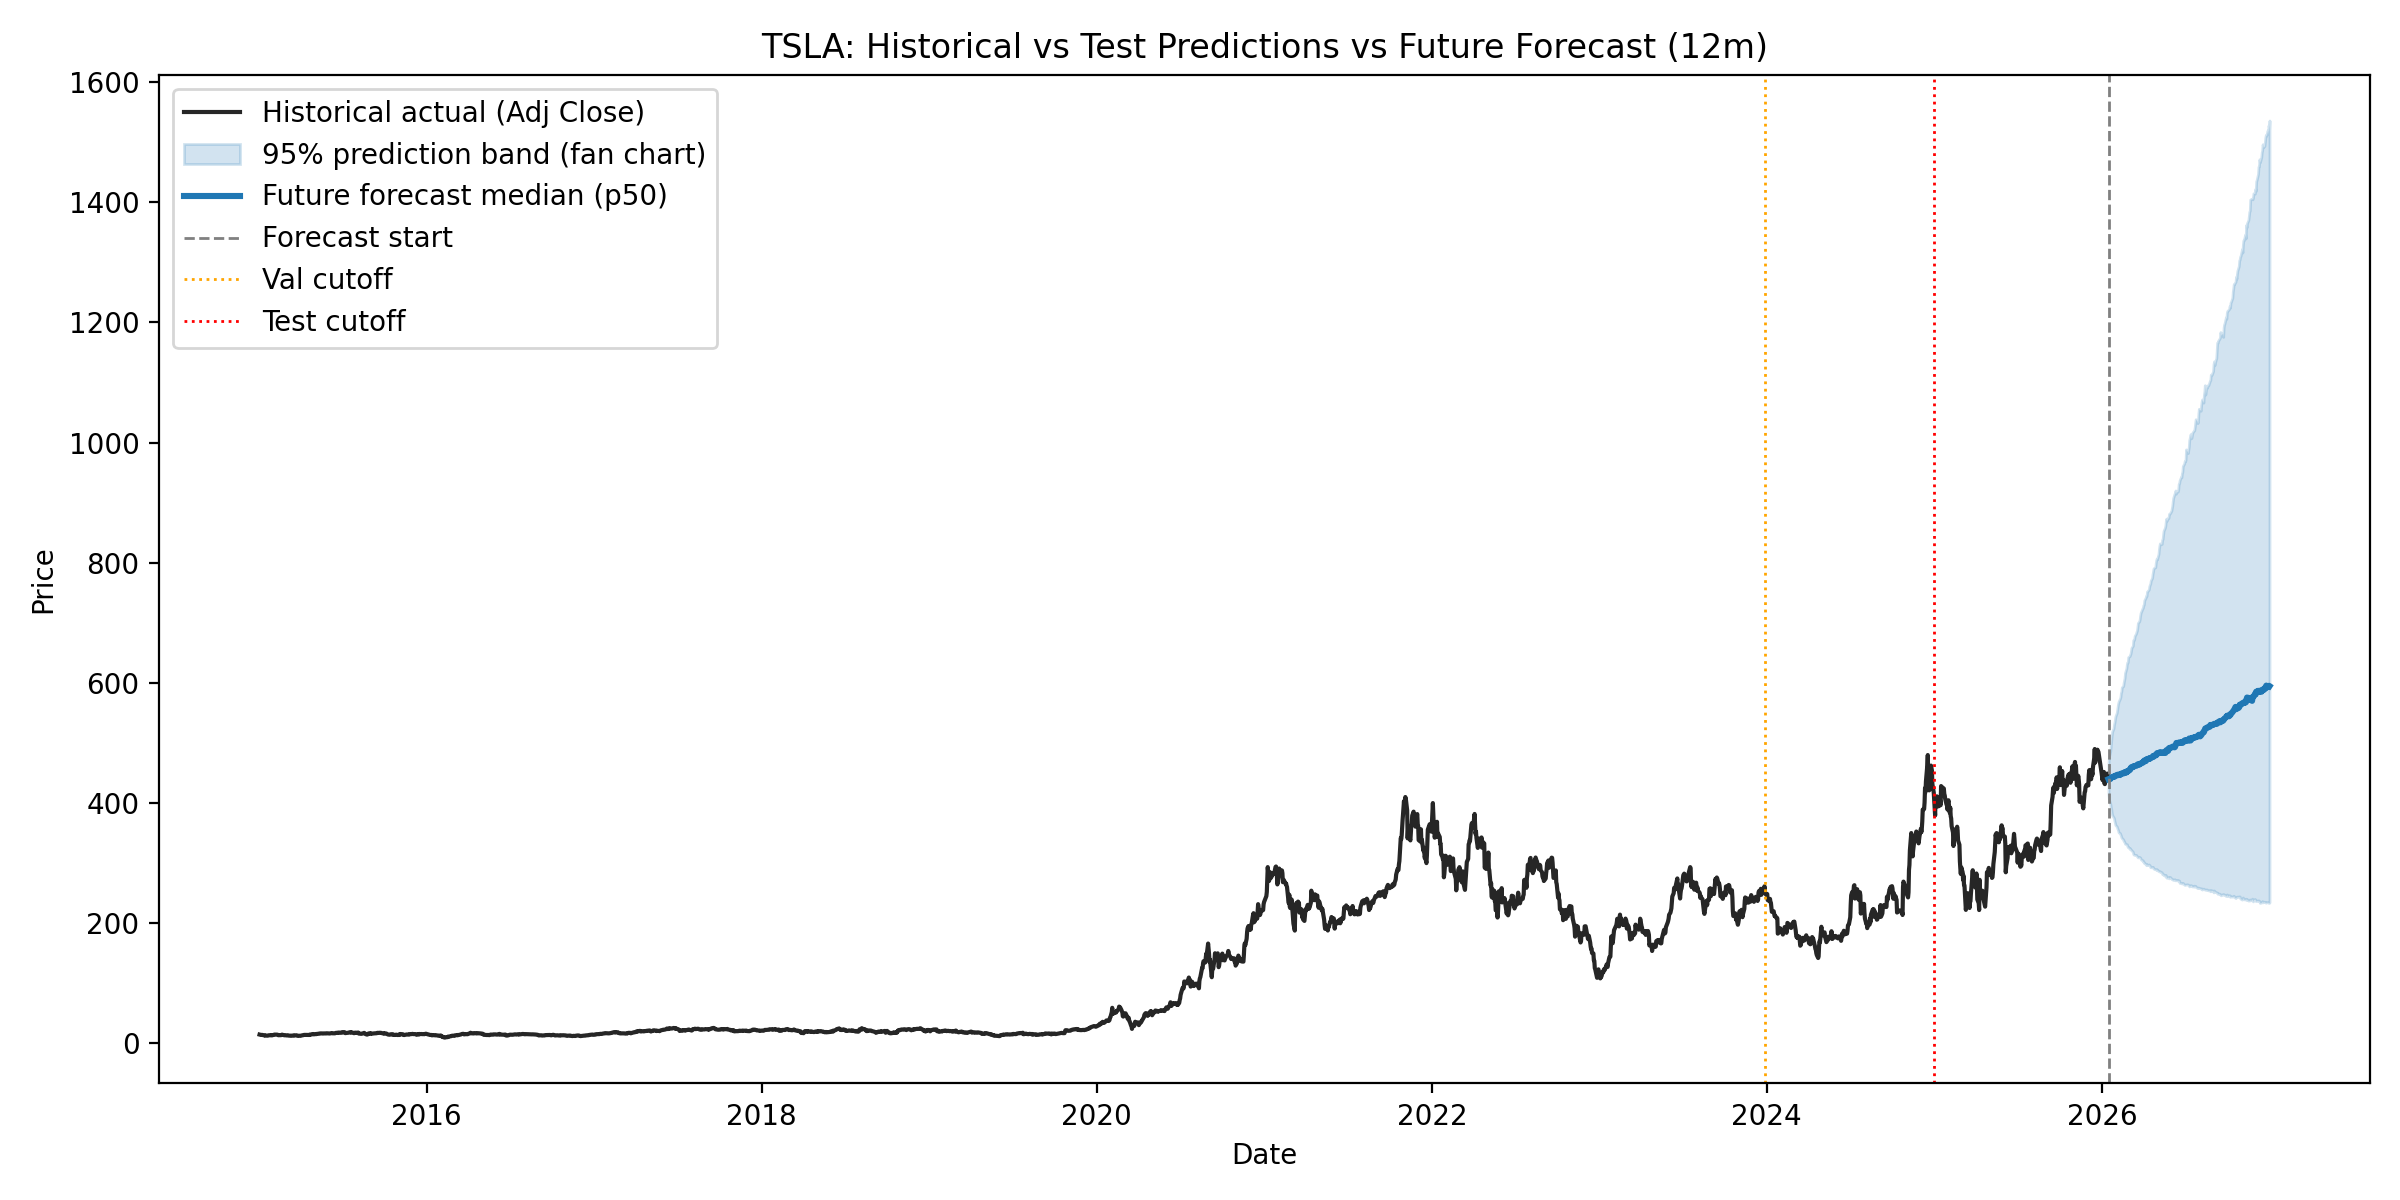

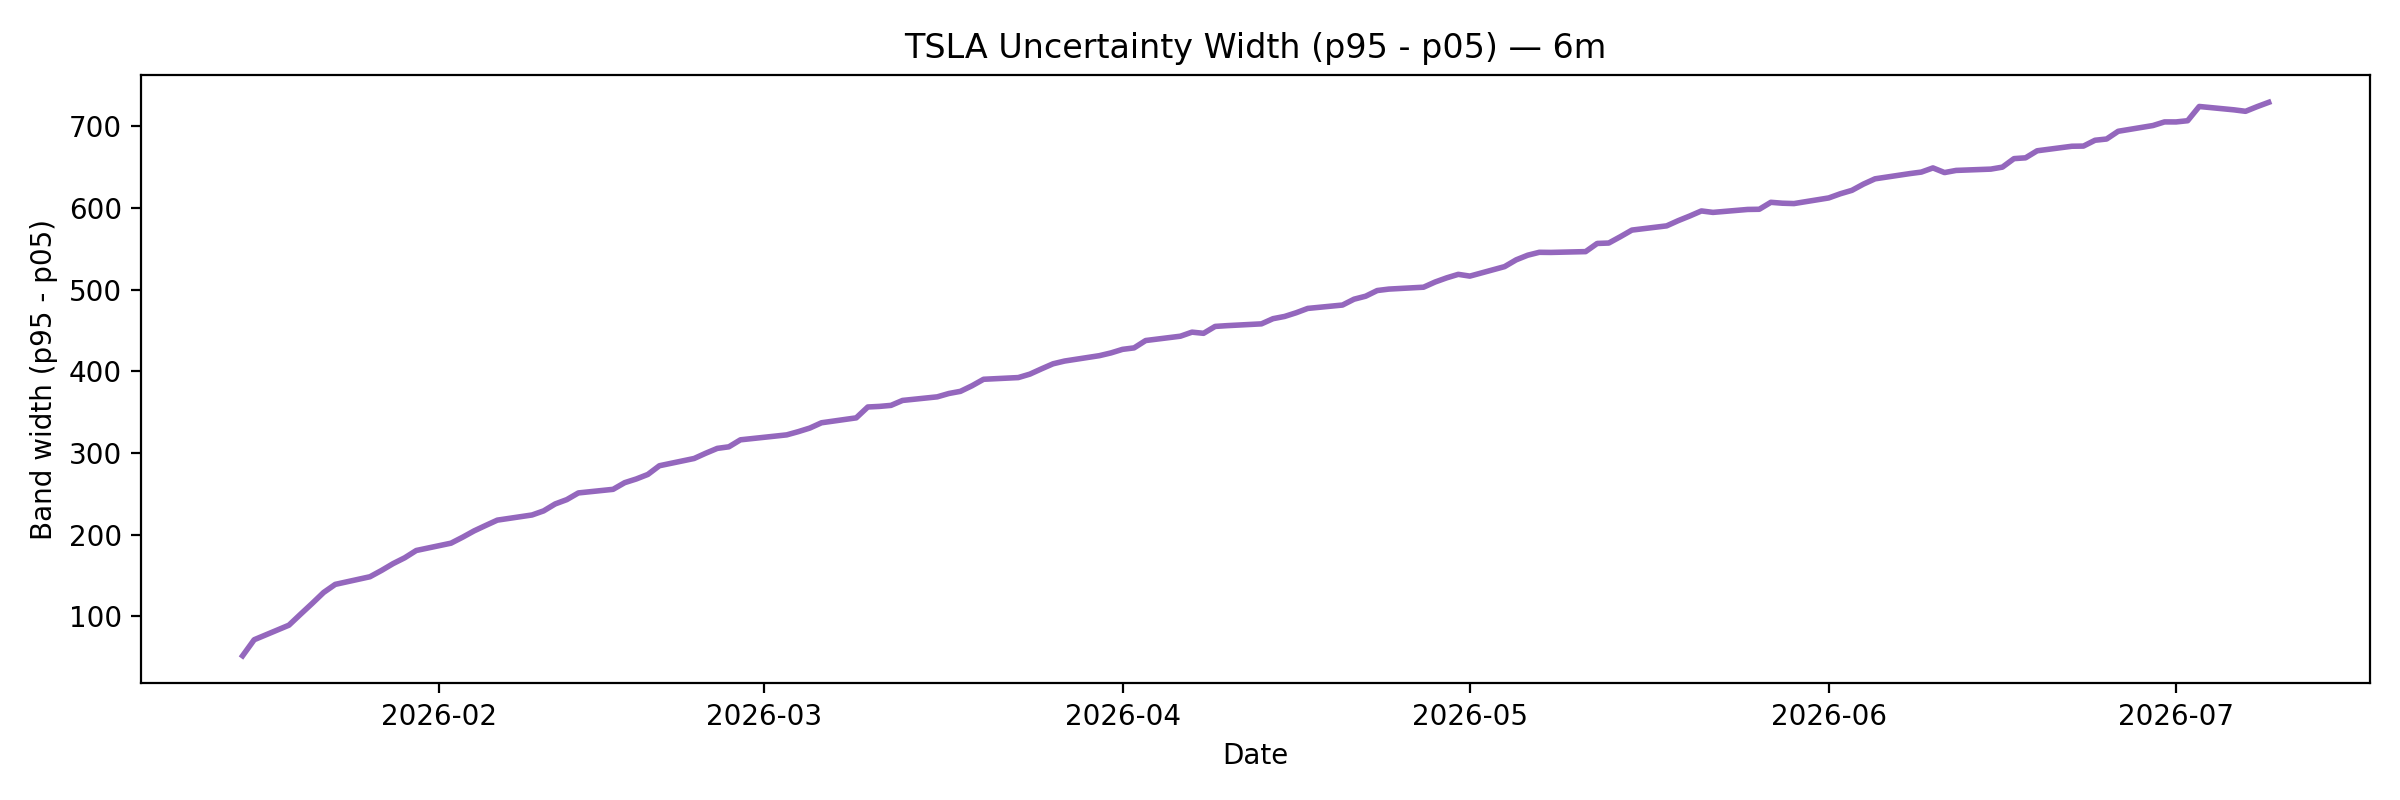

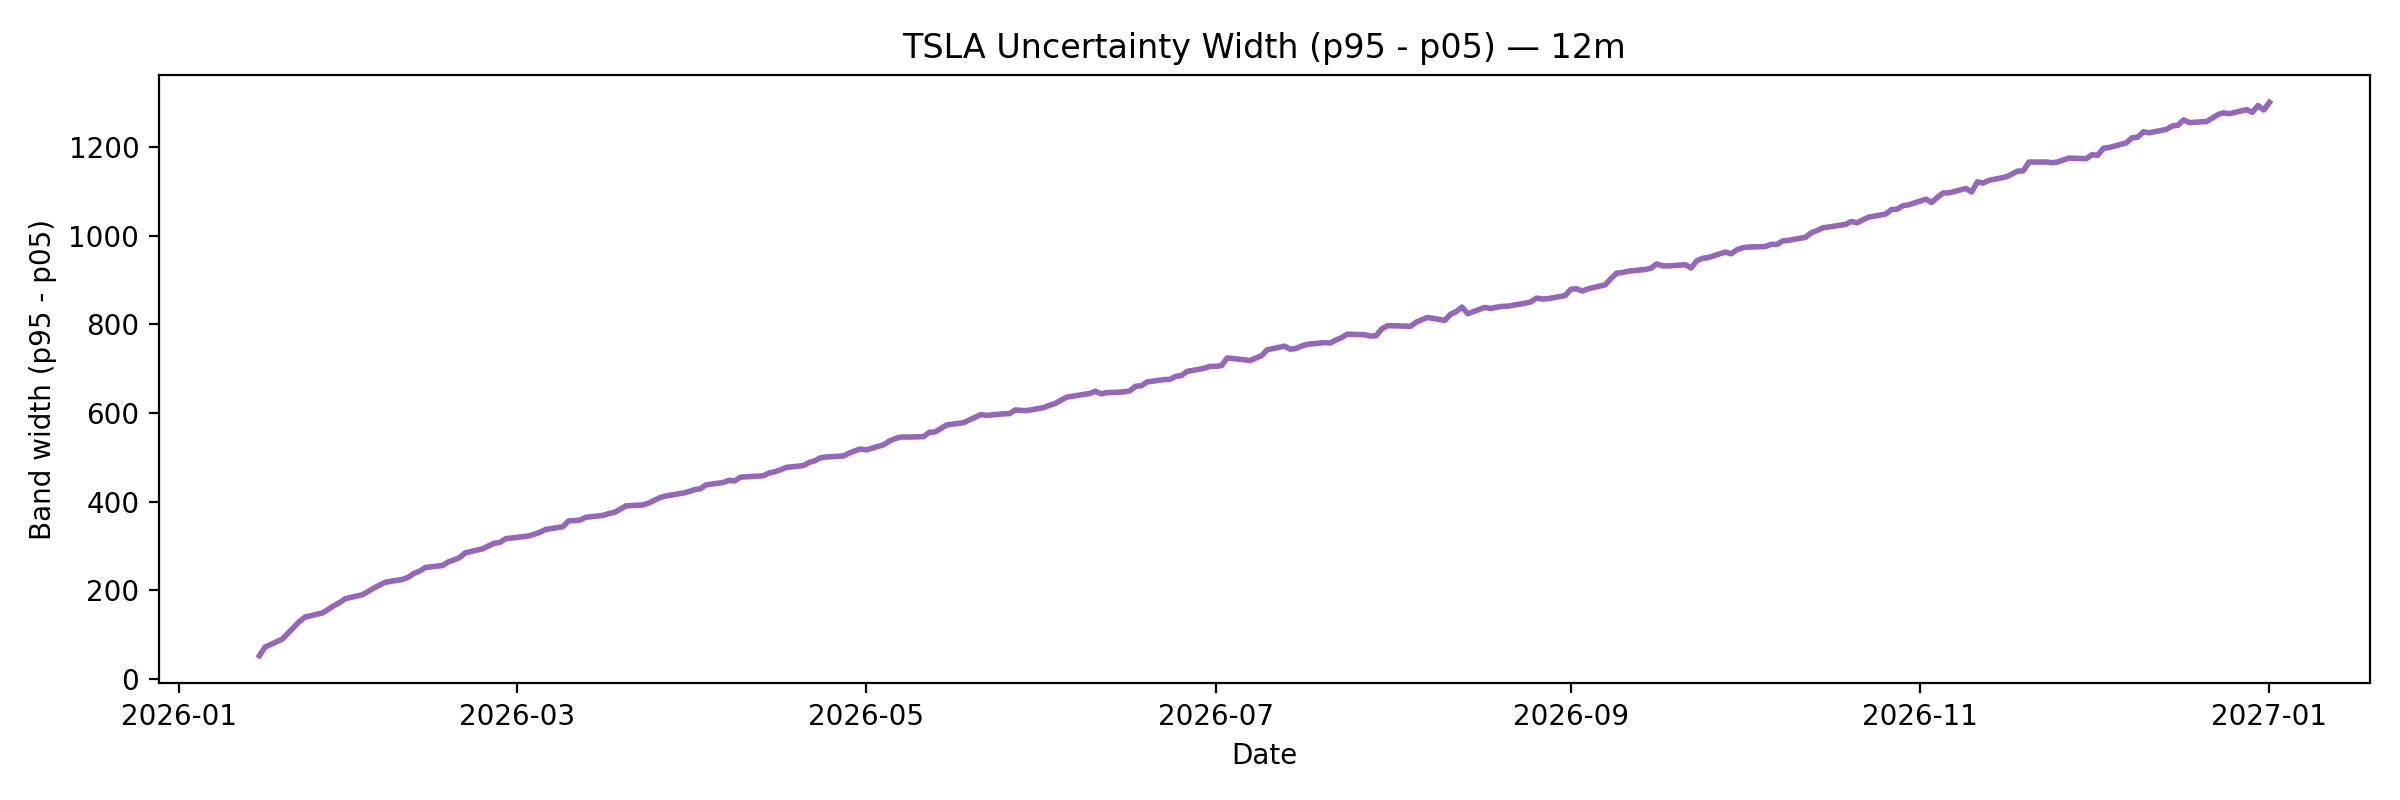

In [5]:
from IPython.display import Image, display

fig_dir = out_dir / "figures"
figs = [
    fig_dir / "fig_task3_price_forecast_6m.png",
    fig_dir / "fig_task3_price_forecast_12m.png",
    fig_dir / "fig_task3_ci_width_6m.png",
    fig_dir / "fig_task3_ci_width_12m.png",
]

for f in figs:
    print("OK" if f.exists() else "MISSING", f)

for f in figs:
    if f.exists():
        display(Image(filename=str(f)))


## 5) Trend analysis + opportunities/risks + reliability assessment (rubric c & d)

This section loads the script-generated markdown outputs.


In [6]:
sum_dir = out_dir / "summaries"

files = [
    sum_dir / "trend_analysis_6m.md",
    sum_dir / "opportunities_risks_6m.md",
    sum_dir / "reliability_assessment_6m.md",
    sum_dir / "trend_analysis_12m.md",
    sum_dir / "opportunities_risks_12m.md",
    sum_dir / "reliability_assessment_12m.md",
]

for f in files:
    print("OK" if f.exists() else "MISSING", f)

print("\n---\n")
for f in files:
    if f.exists():
        print(f"### {f.name}")
        print(f.read_text(encoding="utf-8"))
        print("\n---\n")


OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\trend_analysis_6m.md
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\opportunities_risks_6m.md
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\reliability_assessment_6m.md
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\trend_analysis_12m.md
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\opportunities_risks_12m.md
OK D:\Python\Week 9\portfolio-optimization\outputs\task3\summaries\reliability_assessment_12m.md

---

### trend_analysis_6m.md
## Trend Analysis (6m)

The central forecast (median/p50) indicates an **upward** trend over the forecast window, with an estimated change of **15.11%** from start to end. This summarizes the expected direction under the model’s central scenario.

However, TSLA forecasts should be interpreted primarily through the uncertainty bands. The widening prediction interval over time indicates that confidence in speci

## 6) Deliverables checklist (submission)

### Forecast outputs (rubric a)
- `outputs/task3/forecasts/tsla_prices_forecast_6m.csv`
- `outputs/task3/forecasts/tsla_prices_forecast_12m.csv`
- `outputs/task3/forecasts/tsla_logret_forecast_6m.csv`
- `outputs/task3/forecasts/tsla_logret_forecast_12m.csv`

### Figures with uncertainty bands (rubric b)
- `outputs/task3/figures/fig_task3_price_forecast_6m.png`
- `outputs/task3/figures/fig_task3_price_forecast_12m.png`
- `outputs/task3/figures/fig_task3_ci_width_6m.png`
- `outputs/task3/figures/fig_task3_ci_width_12m.png`

### Written analysis (rubric c & d)
- `outputs/task3/summaries/trend_analysis_6m.md`
- `outputs/task3/summaries/opportunities_risks_6m.md`
- `outputs/task3/summaries/reliability_assessment_6m.md`
- `outputs/task3/summaries/trend_analysis_12m.md`
- `outputs/task3/summaries/opportunities_risks_12m.md`
- `outputs/task3/summaries/reliability_assessment_12m.md`

### Audit trail
- `outputs/task3/task3_spec_used.json`
- `outputs/task3/task3_summary.json`
